In [ ]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
## Import Data
#df = pd.read_csv("Customertravel.csv")
url = 'https://raw.githubusercontent.com/Hakulani/CustomerAnalytics/main/04Churn_Prediction/Customertravel.csv'
df = pd.read_csv(url)

Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
## Explore Data
df.tail()
#df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [ ]:
df.iloc[2]

Age                                      37
FrequentFlyer                            No
AnnualIncomeClass             Middle Income
ServicesOpted                             3
AccountSyncedToSocialMedia              Yes
BookedHotelOrNot                         No
Target                                    0
Name: 2, dtype: object

In [ ]:
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [ ]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [ ]:
df.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

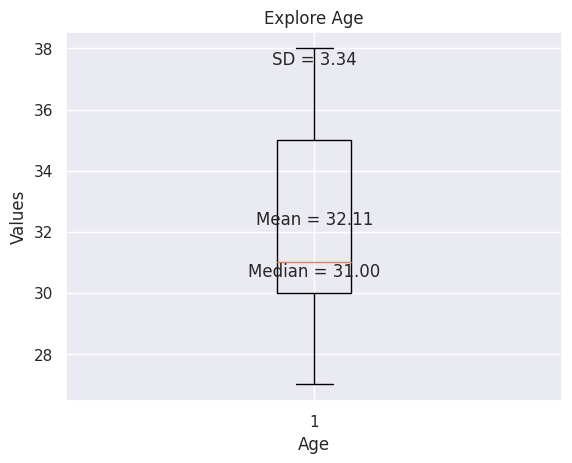

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def get_numerical_cols(df):
    numerical_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
    return numerical_cols

def explore_numerical_columns(df, numerical_cols):
    for col in numerical_cols:
        # Create a box plot for each numerical column
        plt.boxplot(df[col].values)

        # Calculate mean, median, and standard deviation
        mean = df[col].mean()
        median = df[col].median()
        std = df[col].std()

        # Display mean, median, and standard deviation on the plot
        plt.text(1, mean, f"Mean = {mean:.2f}", ha='center', va='bottom')
        plt.text(1, median, f"Median = {median:.2f}", ha='center', va='top')
        plt.text(1, plt.ylim()[1] - 0.05*(plt.ylim()[1]-plt.ylim()[0]), f"SD = {std:.2f}", ha='center', va='top')

        # Set labels for x-axis and y-axis
        plt.xlabel(col)
        plt.ylabel('Values')

        # Display the plot
        plt.title(f"Explore {col}")
        plt.show()

# Assuming you have a DataFrame named df
numerical_cols = ['Age']

explore_numerical_columns(df, numerical_cols)


Univarivate 1 var

Bivarivate 2 var

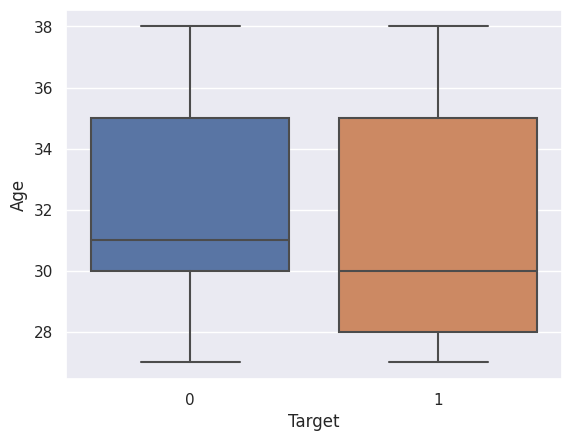

In [ ]:
#Explore avg Age by Target

sns.boxplot(data=df, x='Target', y='Age')
plt.show()

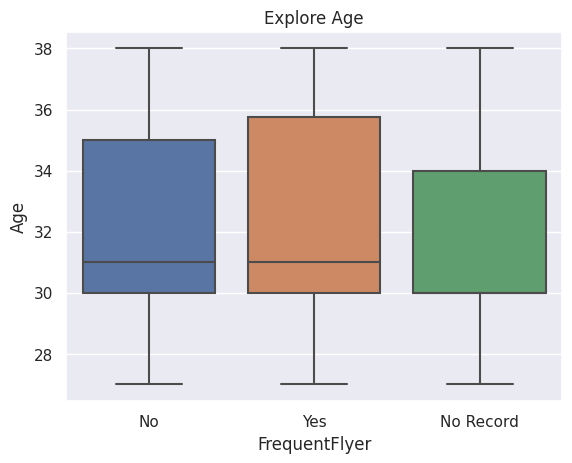

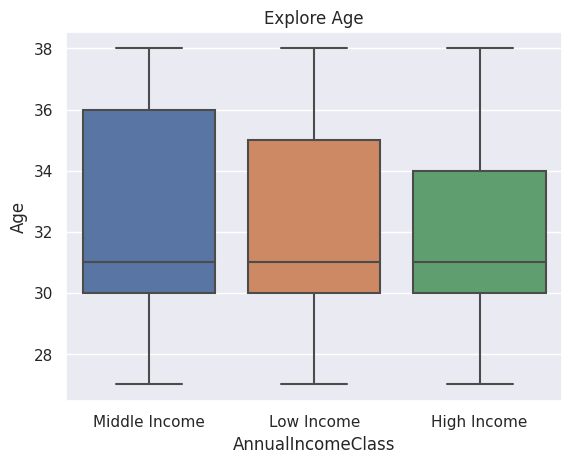

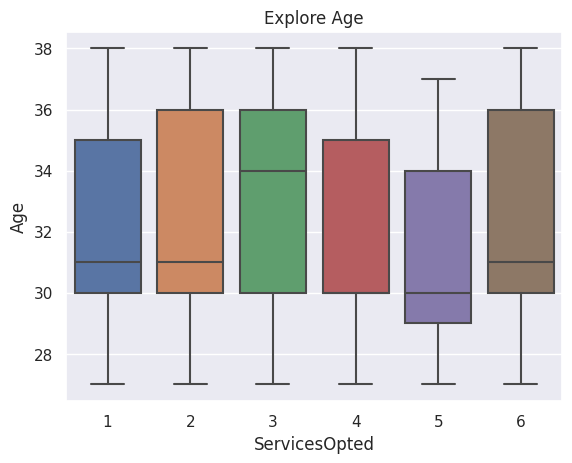

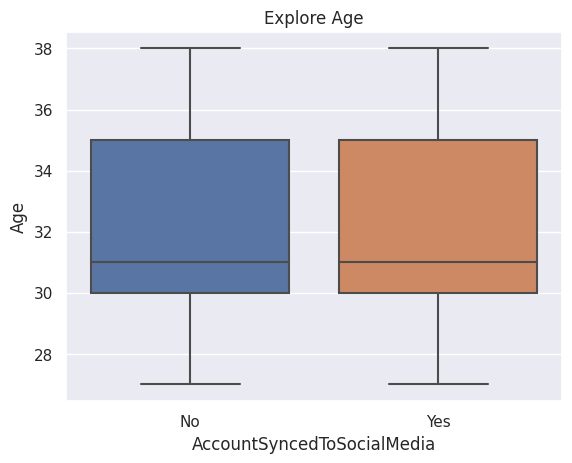

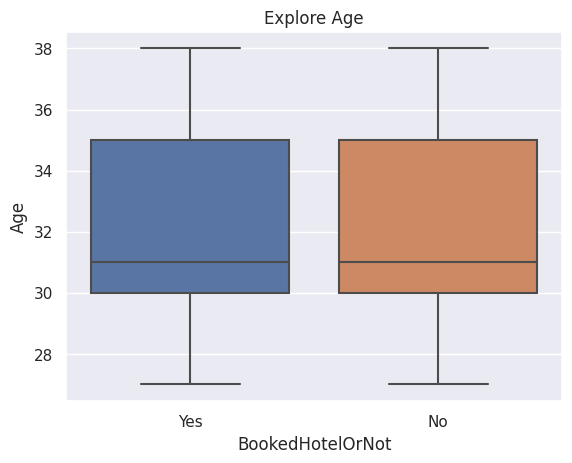

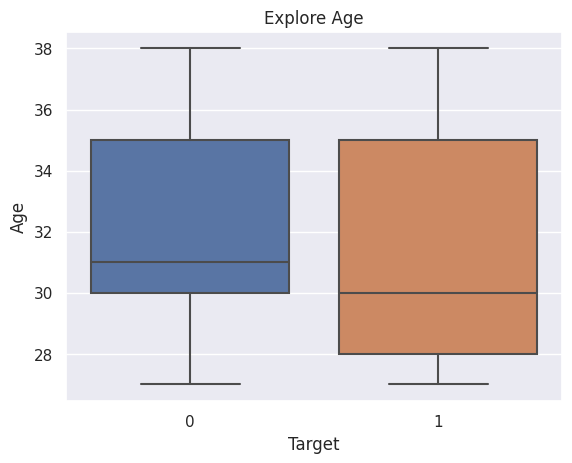

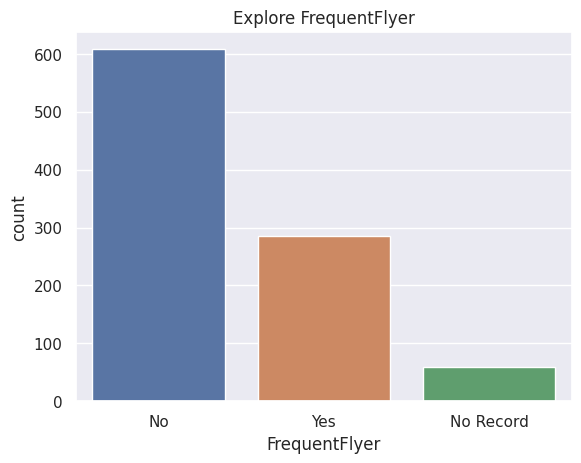

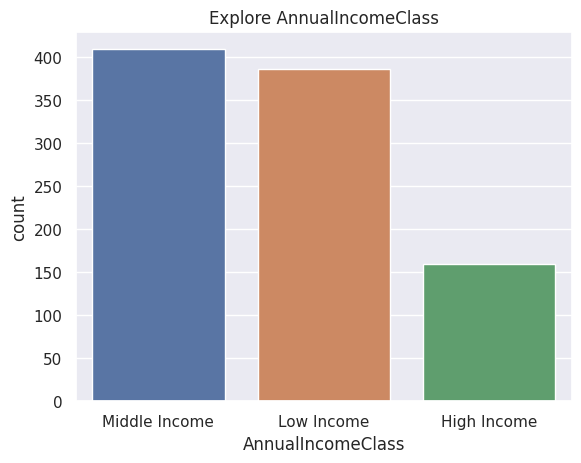

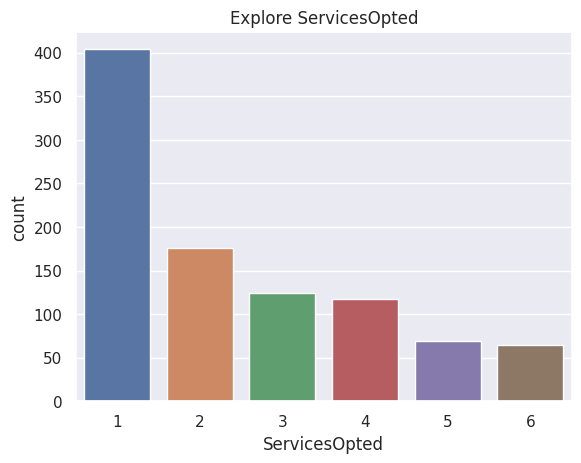

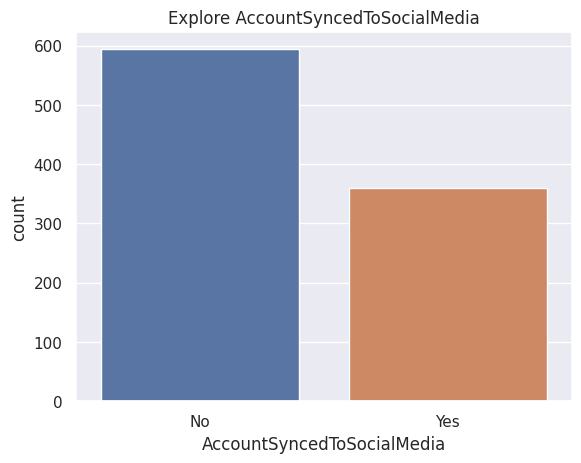

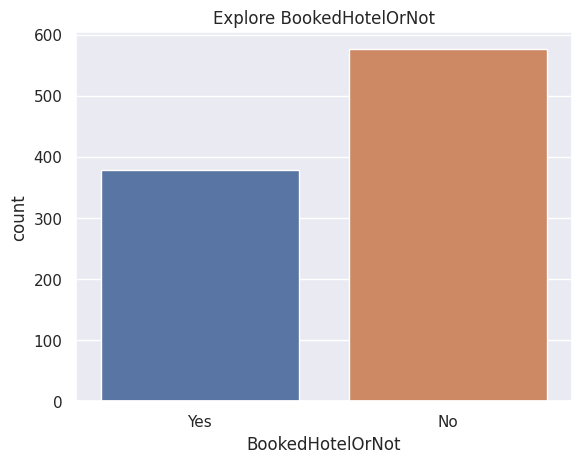

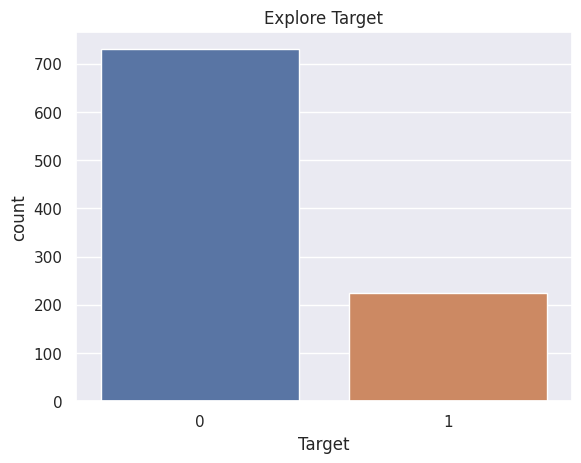

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def explore_numerical_columns(df, numerical_cols):
    for col in numerical_cols:
        # Box plot for each numerical column
        for cols in categorical_cols:
            sns.boxplot(data=df, y=col , x =cols)
            plt.title(f"Explore {col}")
            plt.show()

def explore_categorical_columns(df, categorical_cols):
    for col in categorical_cols:
        # Bar plot for each categorical column
        sns.countplot(data=df, x=col)
        plt.title(f"Explore {col}")
        plt.show()

# Assuming you have a DataFrame named df
numerical_cols = ['Age']
categorical_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target']

explore_numerical_columns(df, numerical_cols)
explore_categorical_columns(df, categorical_cols)


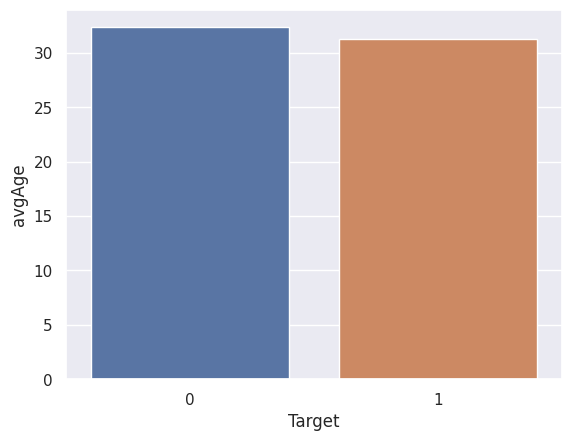

In [ ]:
#Explore avg Age by Target

df_by_target = df.groupby(by=['Target']).agg(
          avgAge=('Age','mean'),
          avgServicesOpted=('ServicesOpted','mean')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='avgAge')
plt.show()

In [ ]:
#Explore ServicesOpted by Target



In [ ]:
#Explore avg ServicesOpted by Target



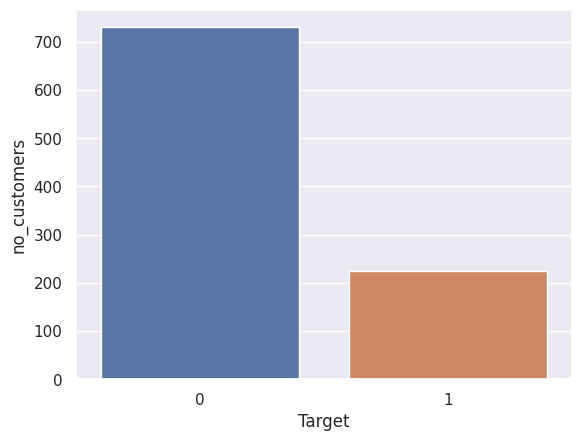

In [ ]:
#Explore No. of customers by Target

df_noCust_by_target = df.groupby(by=['Target']).agg(
          no_customers=('Target','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Target', y='no_customers')
plt.show()

<ipython-input-47-39ffe46151e7>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='FrequentFlyer'>

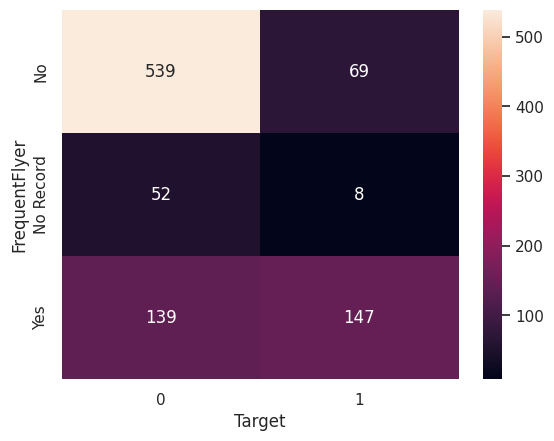

In [ ]:
#Explore FrequentFlyer by Target

df_FrequentFlyer_by_target = df.groupby(by=['FrequentFlyer', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')

sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

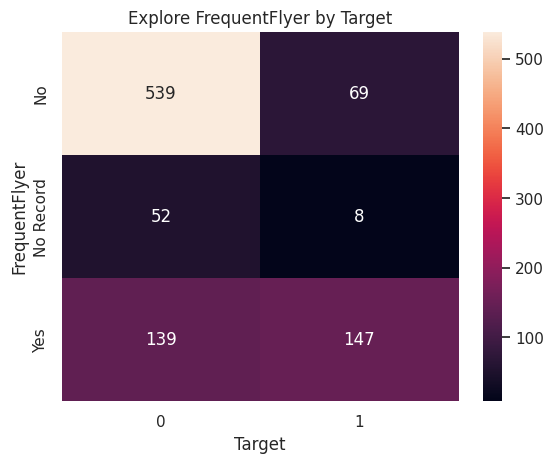

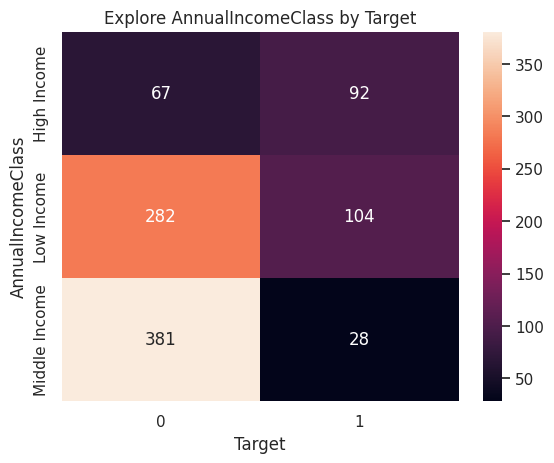

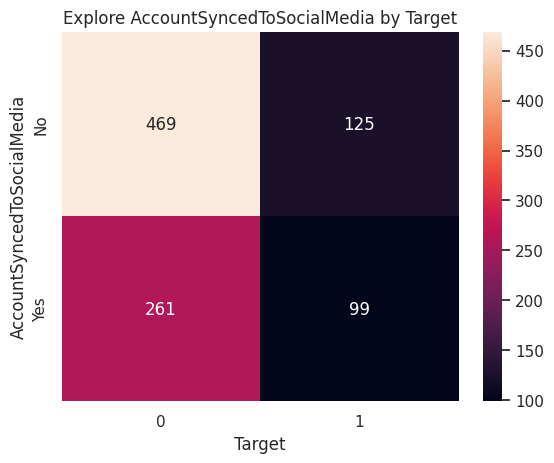

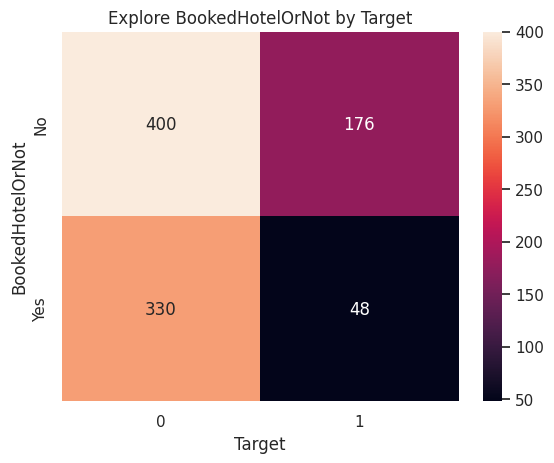

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical_columns(df, categorical_cols):
    for col in categorical_cols:
        # Explore col by Target
        df_col_by_target = df.groupby([col, 'Target']).size().unstack(fill_value=0)
        sns.heatmap(df_col_by_target, annot=True, fmt='.0f')
        plt.title(f"Explore {col} by Target")
        plt.show()

# Assuming you have a DataFrame named df
categorical_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

explore_categorical_columns(df, categorical_cols)


In [ ]:
#Explore AnnualIncomeClass by Target



In [ ]:
#Explore AccountSyncedToSocialMedia by Target



In [ ]:
#Explore BookedHotelOrNot by Target



Data Processing

In [ ]:
cat_data = pd.DataFrame()

cat_data = pd.concat([cat_data, pd.get_dummies(df['FrequentFlyer'], prefix='FrequentFlyer')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['AnnualIncomeClass'], prefix='AnnualIncomeClass')], axis=1)
#cat_data = pd.concat([cat_data, df['AnnualIncomeClass']], axis=1)
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map({'Low Income':0,
                             'Middle Income':1,
                             'High Income':2})

cat_data

,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,1,0,0,0,0,1
1,0,0,1,0,1,0
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,1,0
...,...,...,...,...,...,...
949,0,0,1,0,1,0
950,1,0,0,0,0,1
951,1,0,0,0,0,1
952,1,0,0,0,1,0


In [ ]:
X = pd.concat([df[['Age', 'ServicesOpted']], cat_data], axis=1)
y = df['Target']

Model Creation and Evaluation

In [ ]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42) #Stratified sampling for constant y ratio

In [ ]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       291
           1       0.67      0.43      0.52        91

    accuracy                           0.81       382
   macro avg       0.76      0.68      0.70       382
weighted avg       0.80      0.81      0.80       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


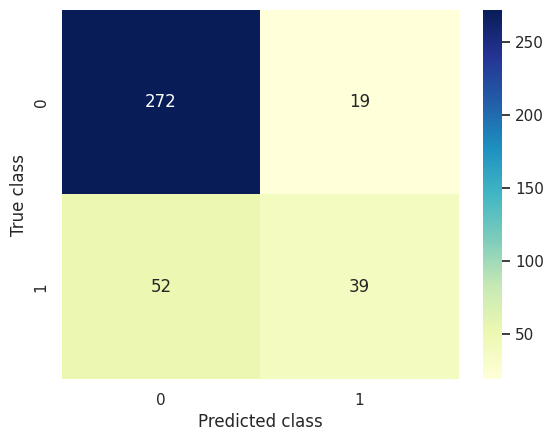

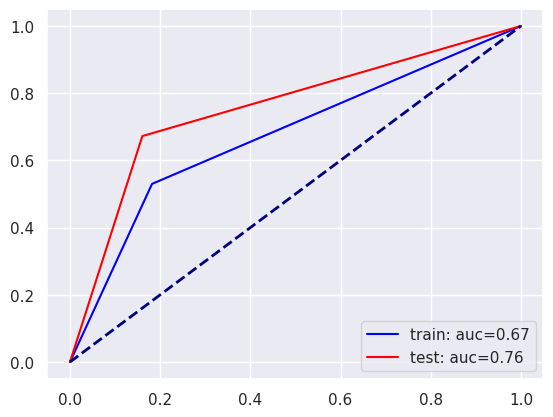

In [ ]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       291
           1       0.69      0.64      0.66        91

    accuracy                           0.85       382
   macro avg       0.79      0.77      0.78       382
weighted avg       0.84      0.85      0.84       382


Confusion Matrix: 



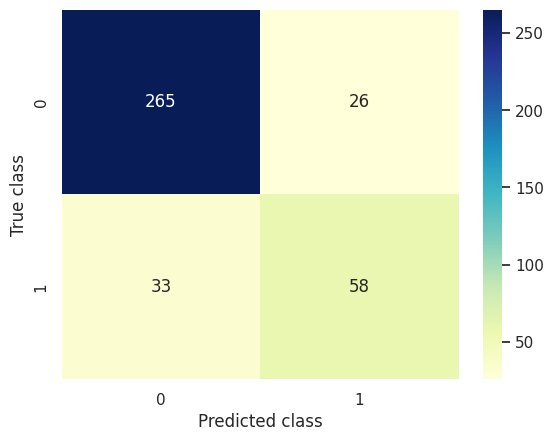

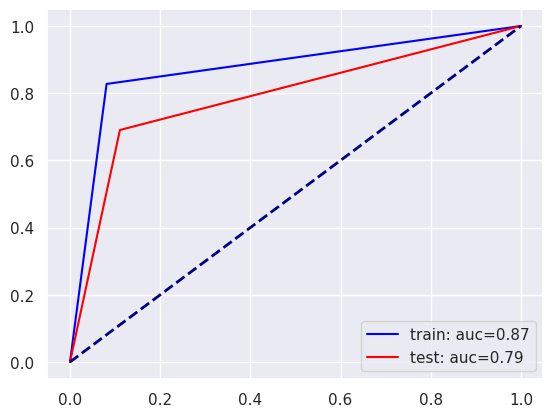

In [ ]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       291
           1       0.77      0.62      0.68        91

    accuracy                           0.86       382
   macro avg       0.83      0.78      0.80       382
weighted avg       0.86      0.86      0.86       382


Confusion Matrix: 



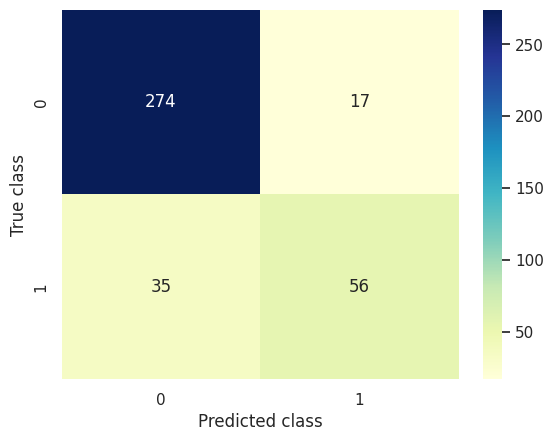

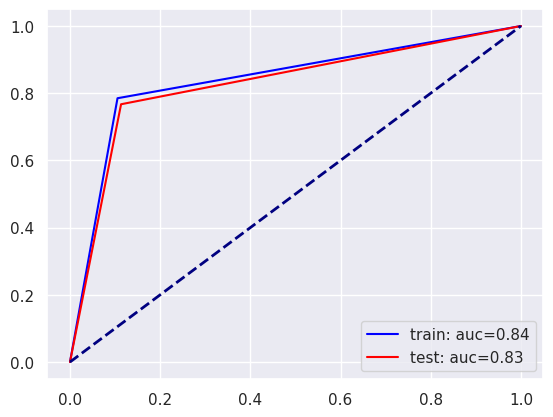

In [ ]:
modelKNN = KNeighborsClassifier()
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

In [ ]:
#!pip install pycaret

In [ ]:
 X_train, X_test, y_train, y_test

(     Age  ServicesOpted  FrequentFlyer_No  FrequentFlyer_No Record  \
 622   35              4                 1                        0   
 272   30              4                 1                        0   
 285   36              6                 0                        0   
 360   30              6                 1                        0   
 354   27              1                 1                        0   
 ..   ...            ...               ...                      ...   
 106   37              1                 0                        0   
 270   37              6                 1                        0   
 860   37              4                 1                        0   
 435   37              6                 0                        0   
 102   31              1                 1                        0   
 
      FrequentFlyer_Yes  AnnualIncomeClass_High Income  \
 622                  0                              0   
 272                  0       

SMOTE

Over_sampling

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       291
           1       0.54      0.71      0.61        91

    accuracy                           0.79       382
   macro avg       0.72      0.76      0.73       382
weighted avg       0.81      0.79      0.79       382


Confusion Matrix: 



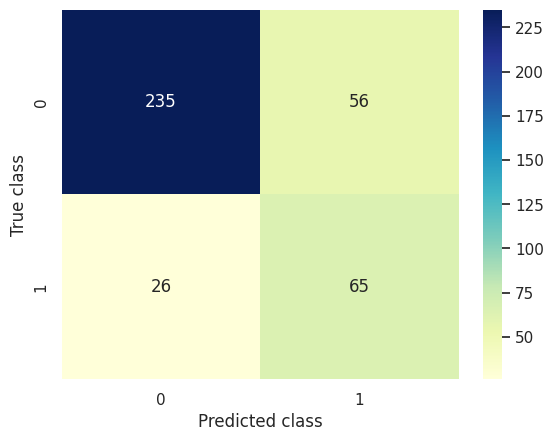

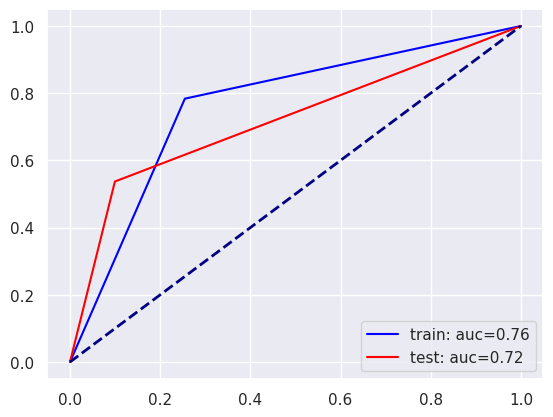

F1 Score: 0.6132075471698114
-----Classifier: LogisticRegression()
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       291
           1       0.61      0.75      0.67        91

    accuracy                           0.82       382
   macro avg       0.76      0.80      0.78       382
weighted avg       0.84      0.82      0.83       382


Confusion Matrix: 



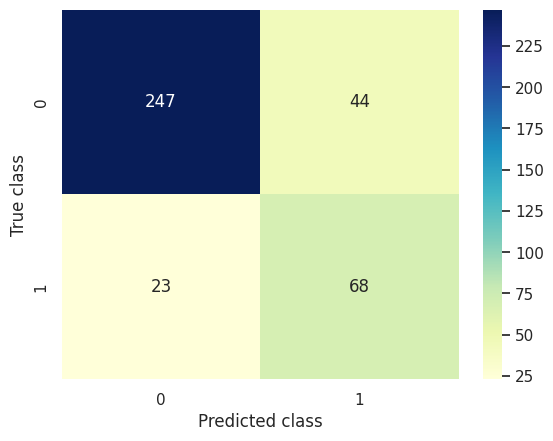

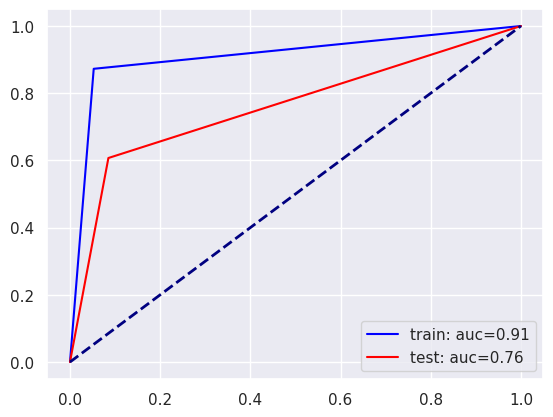

F1 Score: 0.6699507389162561
-----Classifier: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       291
           1       0.59      0.70      0.64        91

    accuracy                           0.81       382
   macro avg       0.75      0.78      0.76       382
weighted avg       0.83      0.81      0.82       382


Confusion Matrix: 



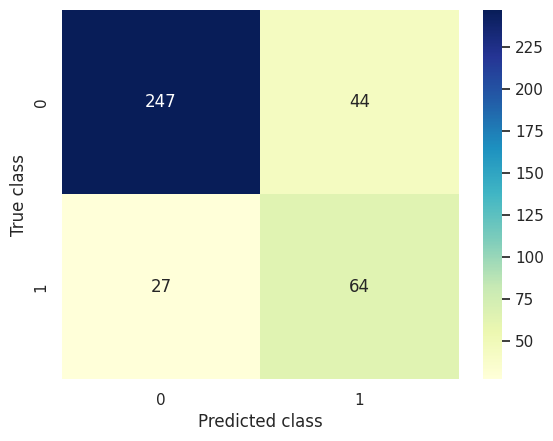

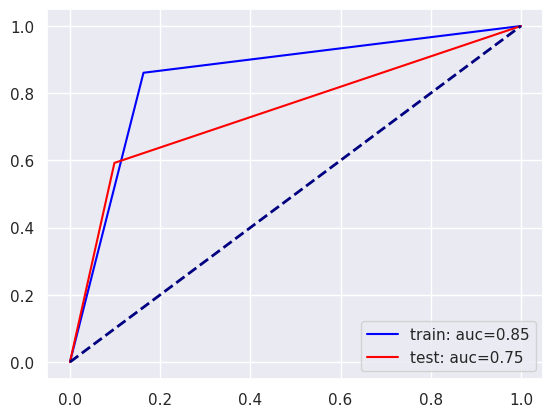

F1 Score: 0.6432160804020101
-----Classifier: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       291
           1       0.64      0.77      0.70        91

    accuracy                           0.84       382
   macro avg       0.78      0.82      0.79       382
weighted avg       0.85      0.84      0.85       382


Confusion Matrix: 



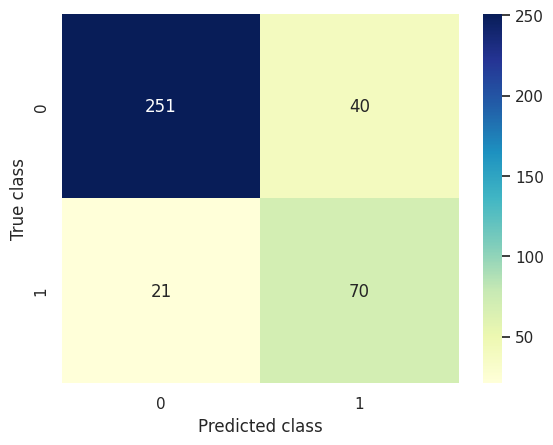

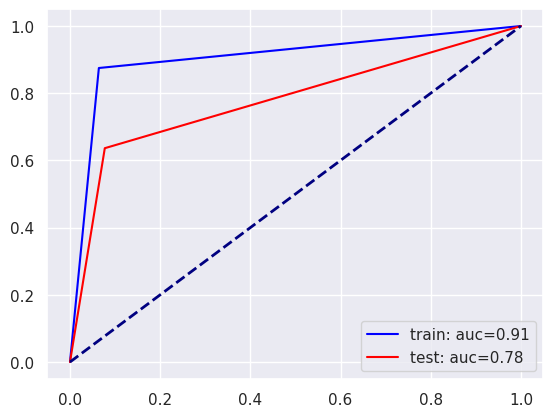

F1 Score: 0.6965174129353234
-----Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Model Rankings based on F1 Score:
XGBClassifier - F1 Score: 0.6965174129353234
RandomForestClassifier - F1 Score: 0.6699507389162561
KNeighborsClassifier - F1 Score: 0.6432160804020101
LogisticRegress

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score

modelLR = LogisticRegression()
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
clfs = [modelLR, modelRF, modelKNN, modelXGB]

f1_scores = []

for clf in clfs:
    fit_evaluate(clf, X_train_SMOTE, X_test, y_train_SMOTE, y_test)
    y_pred_test = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred_test)
    f1_scores.append(f1)
    print("F1 Score:", f1)
    print("-----Classifier:", clf)

# Rank the models based on F1 score
ranked_models = sorted(zip(clfs, f1_scores), key=lambda x: x[1], reverse=True)
print("\nModel Rankings based on F1 Score:")
for model, score in ranked_models:
    print(model.__class__.__name__, "- F1 Score:", score)


* SMOTE and Logistic regression * 

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       291
           1       0.54      0.71      0.61        91

    accuracy                           0.79       382
   macro avg       0.72      0.76      0.73       382
weighted avg       0.81      0.79      0.79       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


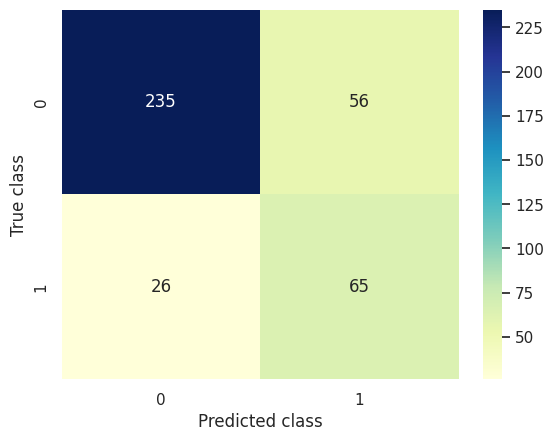

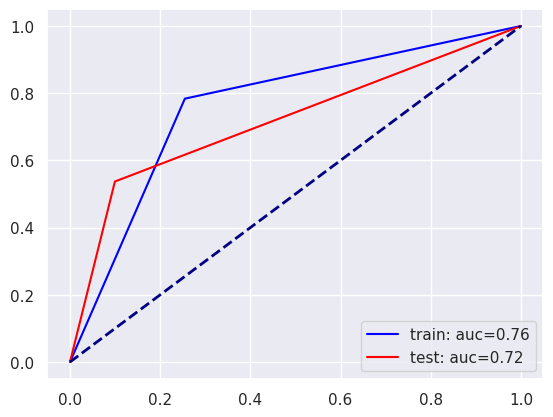

In [ ]:
modelLR = LogisticRegression()
print('* SMOTE and Logistic regression * \n')
fit_evaluate(modelLR, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       291
           1       0.62      0.76      0.68        91

    accuracy                           0.83       382
   macro avg       0.77      0.81      0.78       382
weighted avg       0.85      0.83      0.84       382


Confusion Matrix: 



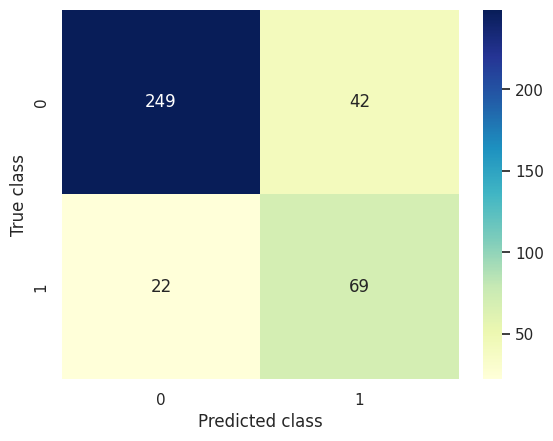

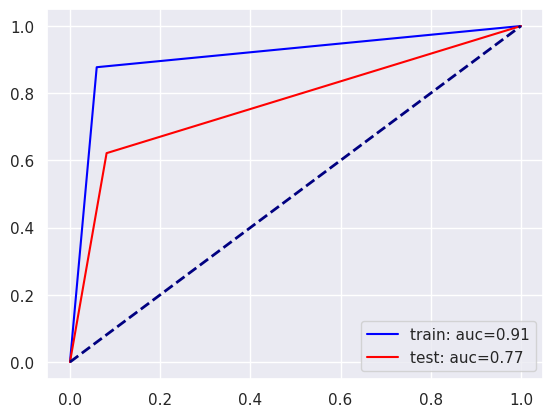

In [ ]:
modelRF = RandomForestClassifier()
print('* SMOTE and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       291
           1       0.59      0.70      0.64        91

    accuracy                           0.81       382
   macro avg       0.75      0.78      0.76       382
weighted avg       0.83      0.81      0.82       382


Confusion Matrix: 



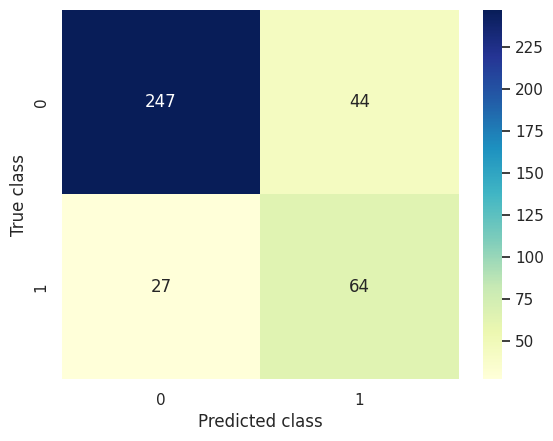

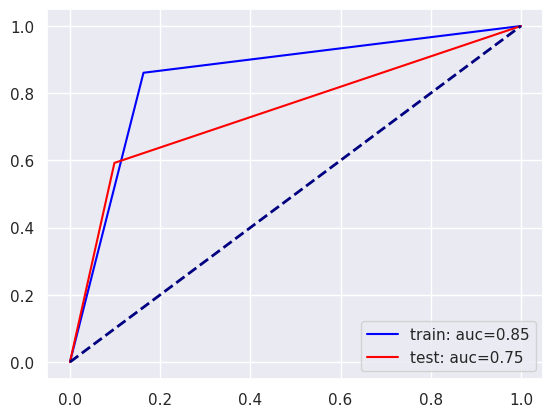

In [ ]:
modelKNN = KNeighborsClassifier()
print('* SMOTE and K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       291
           1       0.64      0.77      0.70        91

    accuracy                           0.84       382
   macro avg       0.78      0.82      0.79       382
weighted avg       0.85      0.84      0.85       382


Confusion Matrix: 



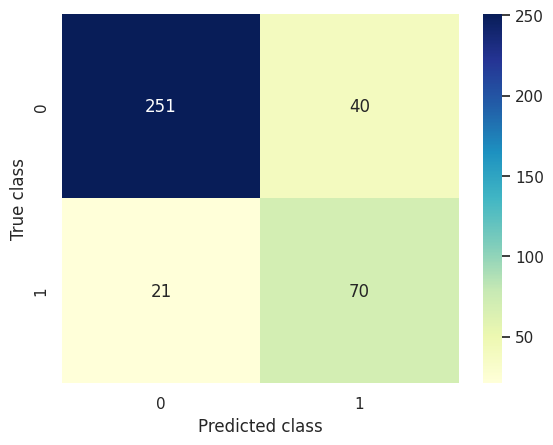

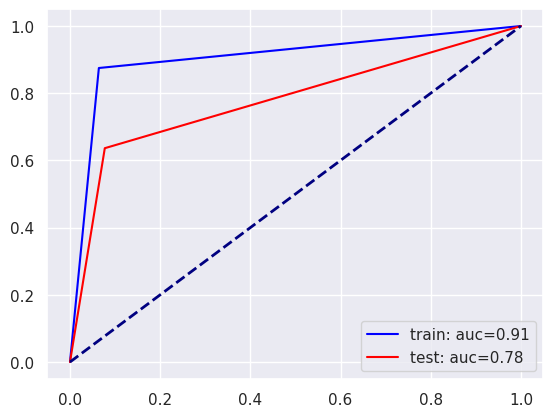

In [ ]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.76      0.83       291
           1       0.51      0.79      0.62        91

    accuracy                           0.77       382
   macro avg       0.72      0.78      0.73       382
weighted avg       0.82      0.77      0.78       382


Confusion Matrix: 



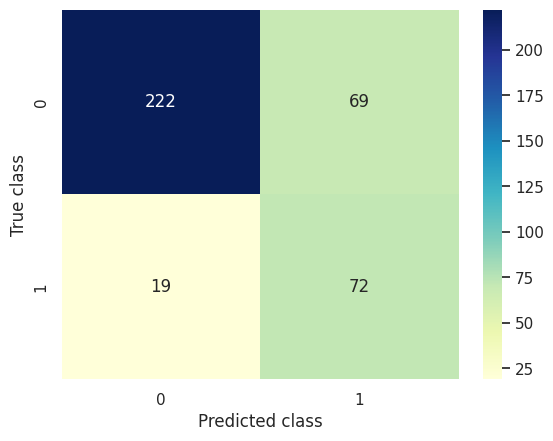

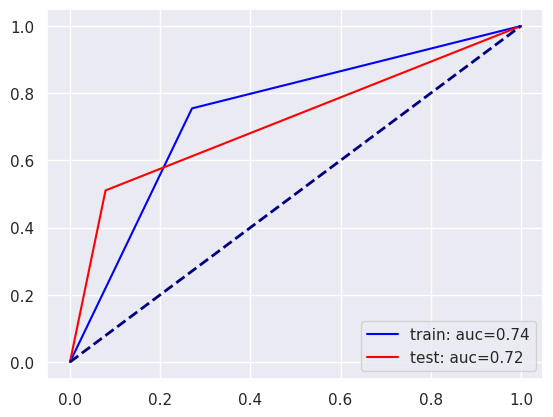

F1 Score: 0.6206896551724138
-----Classifier: LogisticRegression()
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       291
           1       0.58      0.79      0.67        91

    accuracy                           0.81       382
   macro avg       0.75      0.80      0.77       382
weighted avg       0.84      0.81      0.82       382


Confusion Matrix: 



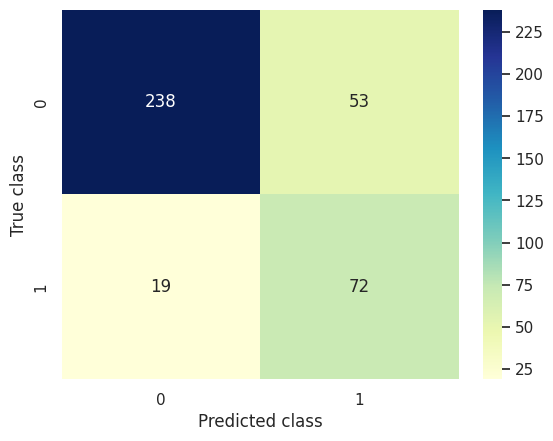

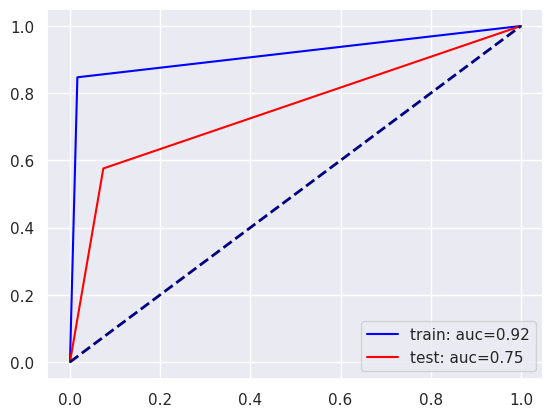

F1 Score: 0.6666666666666666
-----Classifier: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       291
           1       0.62      0.70      0.66        91

    accuracy                           0.82       382
   macro avg       0.76      0.78      0.77       382
weighted avg       0.83      0.82      0.83       382


Confusion Matrix: 



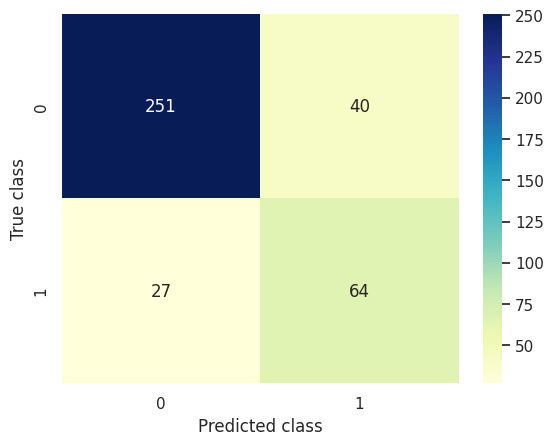

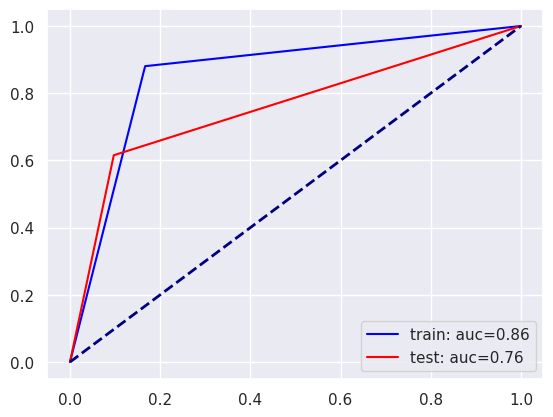

F1 Score: 0.6564102564102564
-----Classifier: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       291
           1       0.60      0.82      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.83      0.79       382
weighted avg       0.86      0.83      0.84       382


Confusion Matrix: 



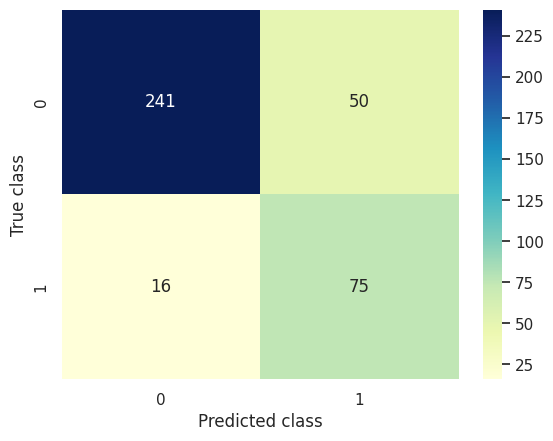

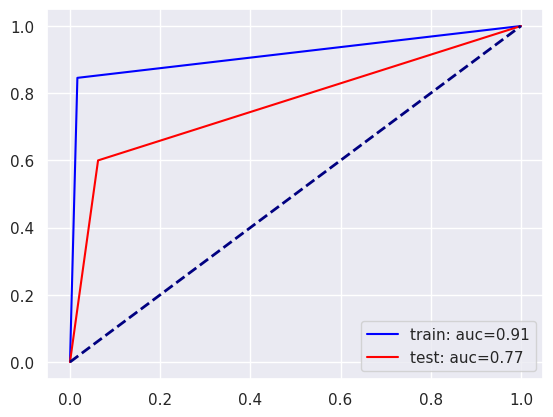

F1 Score: 0.6944444444444445
-----Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Model Rankings based on F1 Score:
XGBClassifier - F1 Score: 0.6944444444444445
RandomForestClassifier - F1 Score: 0.6666666666666666
KNeighborsClassifier - F1 Score: 0.6564102564102564
LogisticRegress

In [ ]:
import xgboost as xgb

modelLR = LogisticRegression()
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
clfs = [modelLR,modelRF,modelKNN,modelXGB]


f1_scores = []

for clf in clfs:
    fit_evaluate(clf, X_oversampled, X_test, y_oversampled, y_test)
    y_pred_test = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred_test)
    f1_scores.append(f1)
    print("F1 Score:", f1)
    print("-----Classifier:", clf)

# Rank the models based on F1 score
ranked_models = sorted(zip(clfs, f1_scores), key=lambda x: x[1], reverse=True)
print("\nModel Rankings based on F1 Score:")
for model, score in ranked_models:
    print(model.__class__.__name__, "- F1 Score:", score)


Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.74      0.82       291
           1       0.49      0.79      0.60        91

    accuracy                           0.75       382
   macro avg       0.70      0.77      0.71       382
weighted avg       0.82      0.75      0.77       382


Confusion Matrix: 



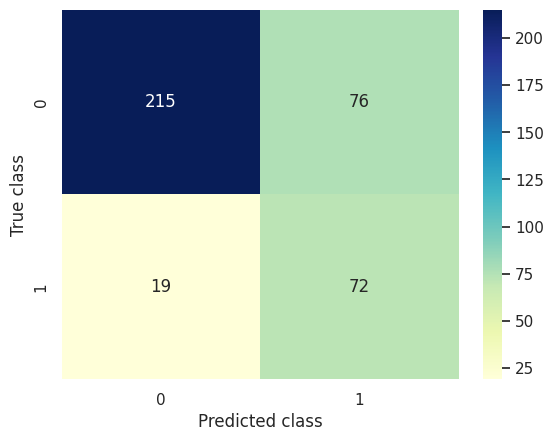

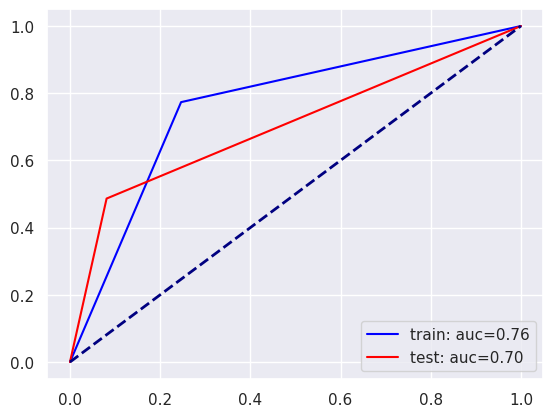

F1 Score: 0.602510460251046
-----Classifier: LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       291
           1       0.50      0.89      0.64        91

    accuracy                           0.76       382
   macro avg       0.73      0.81      0.73       382
weighted avg       0.85      0.76      0.78       382


Confusion Matrix: 



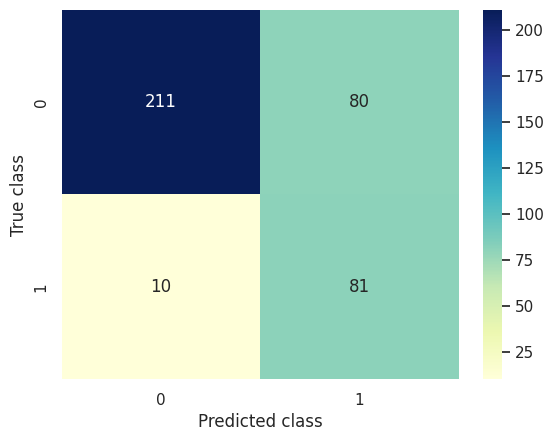

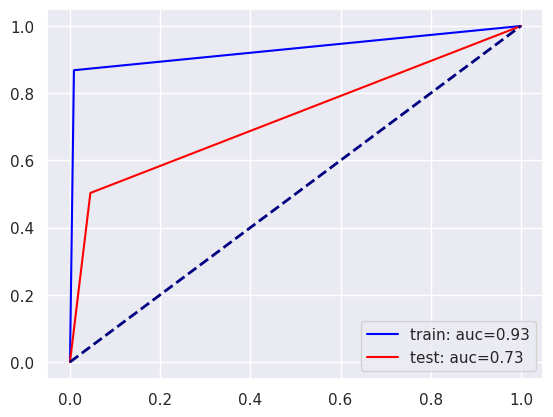

F1 Score: 0.6428571428571428
-----Classifier: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       291
           1       0.48      0.82      0.61        91

    accuracy                           0.75       382
   macro avg       0.70      0.77      0.71       382
weighted avg       0.82      0.75      0.76       382


Confusion Matrix: 



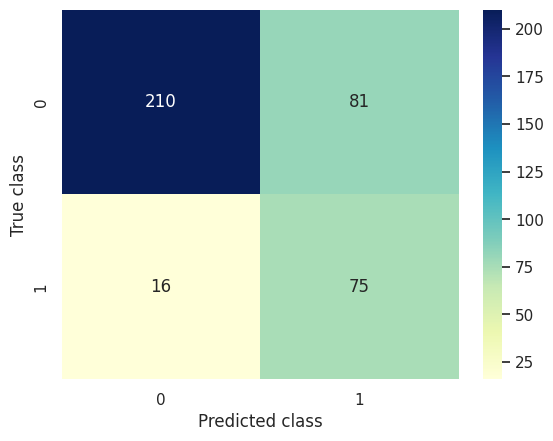

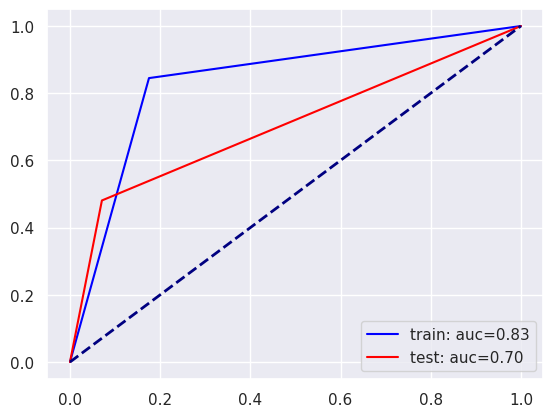

F1 Score: 0.6072874493927125
-----Classifier: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       291
           1       0.53      0.82      0.64        91

    accuracy                           0.78       382
   macro avg       0.73      0.80      0.74       382
weighted avg       0.84      0.78      0.80       382


Confusion Matrix: 



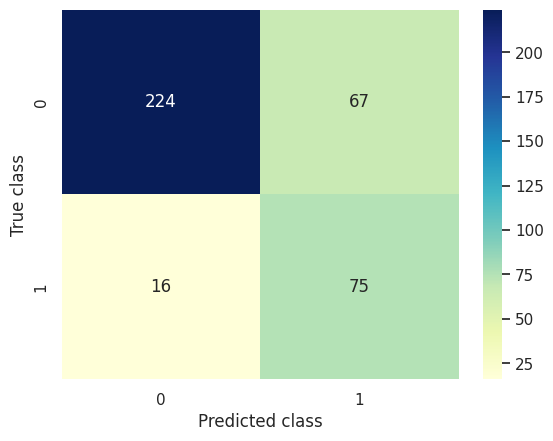

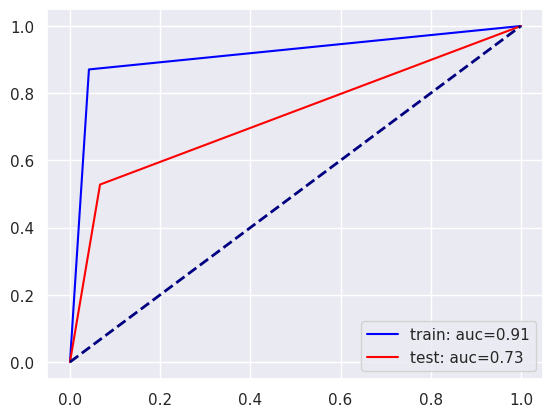

F1 Score: 0.6437768240343348
-----Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Model Rankings based on F1 Score:
XGBClassifier - F1 Score: 0.6437768240343348
RandomForestClassifier - F1 Score: 0.6428571428571428
KNeighborsClassifier - F1 Score: 0.6072874493927125
LogisticRegress

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


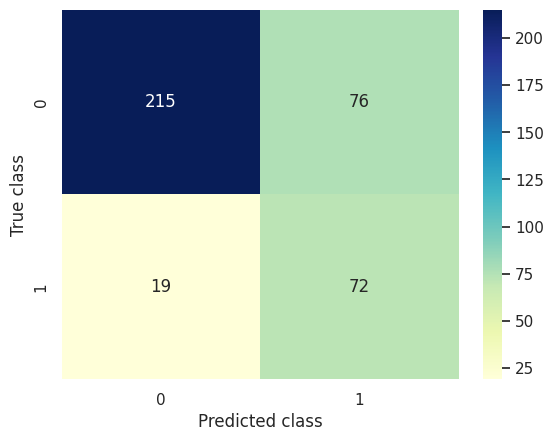

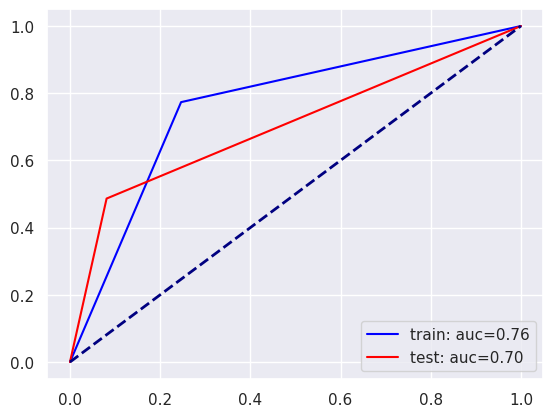

F1 Score: 0.602510460251046
-----Classifier: LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       291
           1       0.51      0.89      0.65        91

    accuracy                           0.77       382
   macro avg       0.73      0.81      0.74       382
weighted avg       0.85      0.77      0.78       382


Confusion Matrix: 



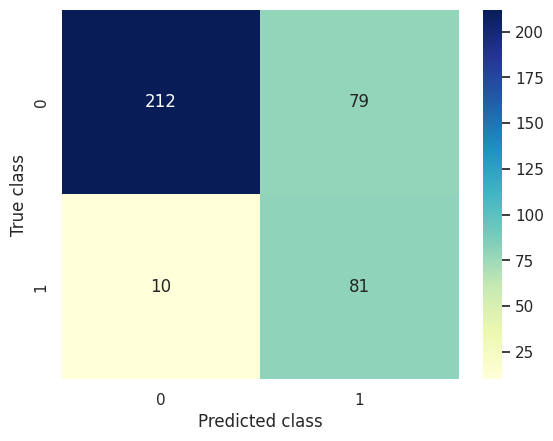

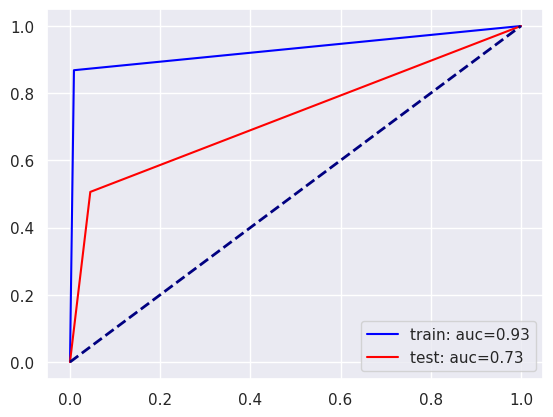

F1 Score: 0.645418326693227
-----Classifier: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       291
           1       0.48      0.82      0.61        91

    accuracy                           0.75       382
   macro avg       0.70      0.77      0.71       382
weighted avg       0.82      0.75      0.76       382


Confusion Matrix: 



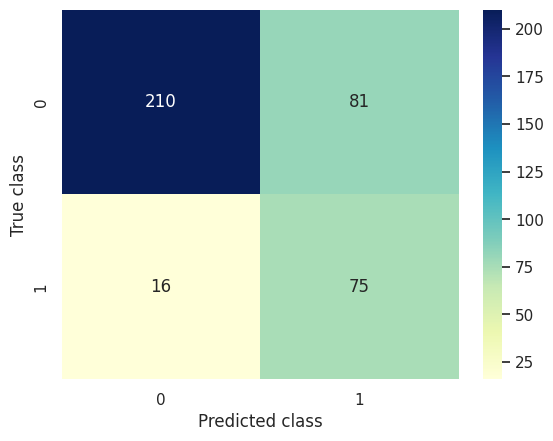

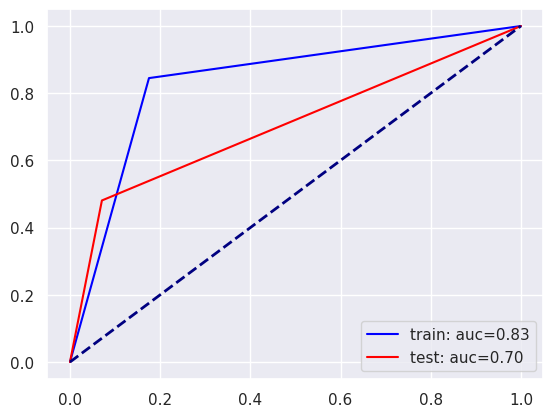

F1 Score: 0.6072874493927125
-----Classifier: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       291
           1       0.53      0.82      0.64        91

    accuracy                           0.78       382
   macro avg       0.73      0.80      0.74       382
weighted avg       0.84      0.78      0.80       382


Confusion Matrix: 



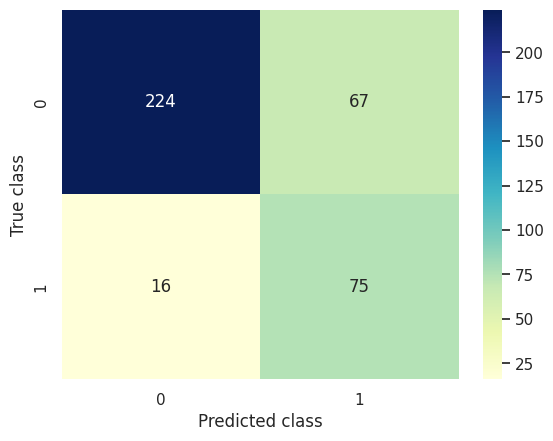

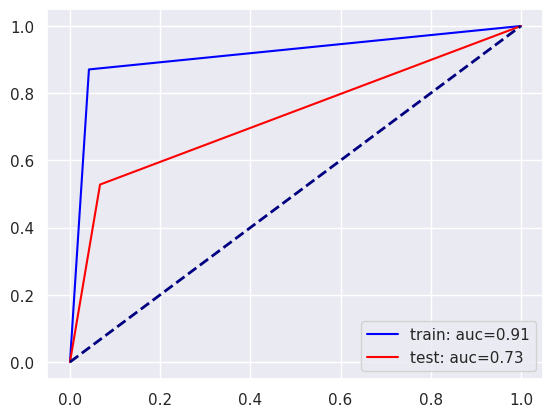

F1 Score: 0.6437768240343348
-----Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Model Rankings based on F1 Score:
RandomForestClassifier - F1 Score: 0.645418326693227
XGBClassifier - F1 Score: 0.6437768240343348
KNeighborsClassifier - F1 Score: 0.6072874493927125
LogisticRegressi

In [ ]:
import xgboost as xgb

modelLR = LogisticRegression()
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
clfs = [modelLR,modelRF,modelKNN,modelXGB]

f1_scores = []

for clf in clfs:
    fit_evaluate(clf, X_undersampled, X_test, y_undersampled, y_test)
    y_pred_test = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred_test)
    f1_scores.append(f1)
    print("F1 Score:", f1)
    print("-----Classifier:", clf)

# Rank the models based on F1 score
ranked_models = sorted(zip(clfs, f1_scores), key=lambda x: x[1], reverse=True)
print("\nModel Rankings based on F1 Score:")
for model, score in ranked_models:
    print(model.__class__.__name__, "- F1 Score:", score)

XGBoost

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       291
           1       0.53      0.82      0.64        91

    accuracy                           0.78       382
   macro avg       0.73      0.80      0.74       382
weighted avg       0.84      0.78      0.80       382


Confusion Matrix: 



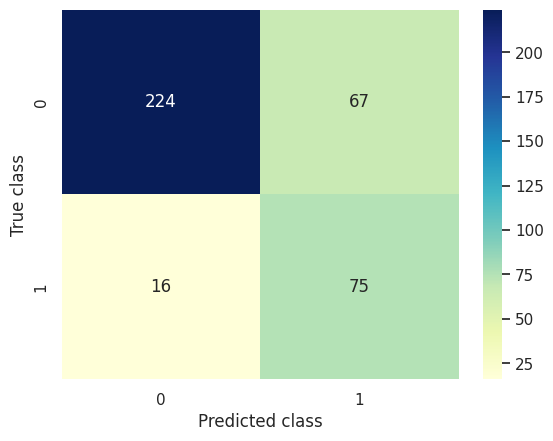

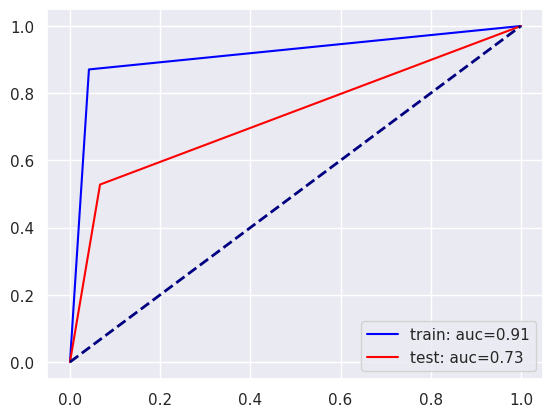

In [ ]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_undersampled, X_test, y_undersampled, y_test)

XGBoost - Hyperparameter Tuning

In [ ]:
## building pipeline for hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Create a pipeline
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=9))
])

In [ ]:
## hyper parameter tuning - grid search

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': range(2, 4),
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [2],
  }
]
# Define cross validation
kfold = KFold(n_splits=5)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score), 'F1 score': 'f1_micro'}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
print(xgb_model_clv_GS.best_params_)

{'clf__colsample_bytree': 0.2, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__n_estimators': 50, 'fs__k': 2, 'fs__score_func': <function chi2 at 0x7f48ba1ee8c0>}


* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       291
           1       0.93      0.29      0.44        91

    accuracy                           0.82       382
   macro avg       0.87      0.64      0.67       382
weighted avg       0.84      0.82      0.79       382


Confusion Matrix: 



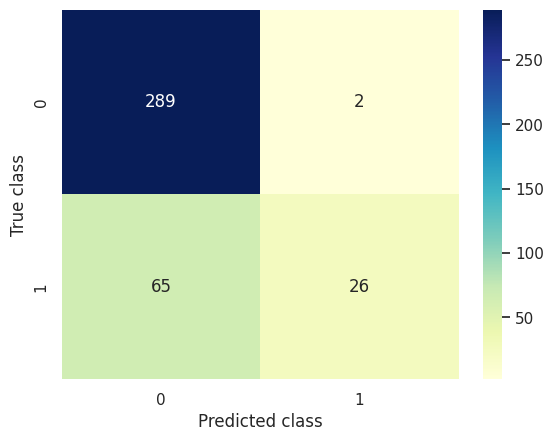

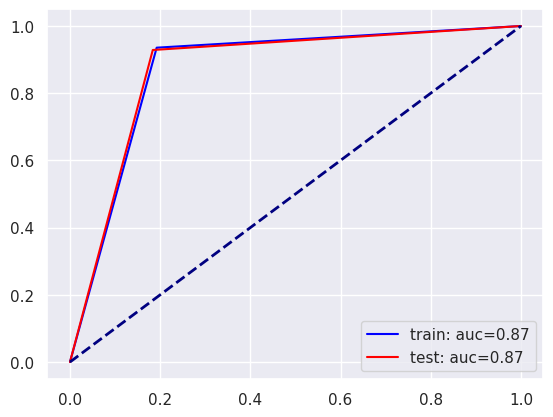

In [ ]:
modelXGB = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': [3, 4, 5],
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [f_classif],
    'fs__k': ['all'],
  }
]

# Define cross validation
kfold = KFold(n_splits=5)

# F1 score as score
scoring = {'F1 score': 'f1_micro'}

# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='F1 score',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

# Get best parameters and best F1 score
best_params = xgb_model_clv_GS.best_params_
best_score = xgb_model_clv_GS.best_score_

# Print best parameters and best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'clf__colsample_bytree': 0.4, 'clf__gamma': 0.2, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 400, 'fs__k': 'all', 'fs__score_func': <function f_classif at 0x7f48ba1ed6c0>}
Best F1 Score: 0.7901754385964912


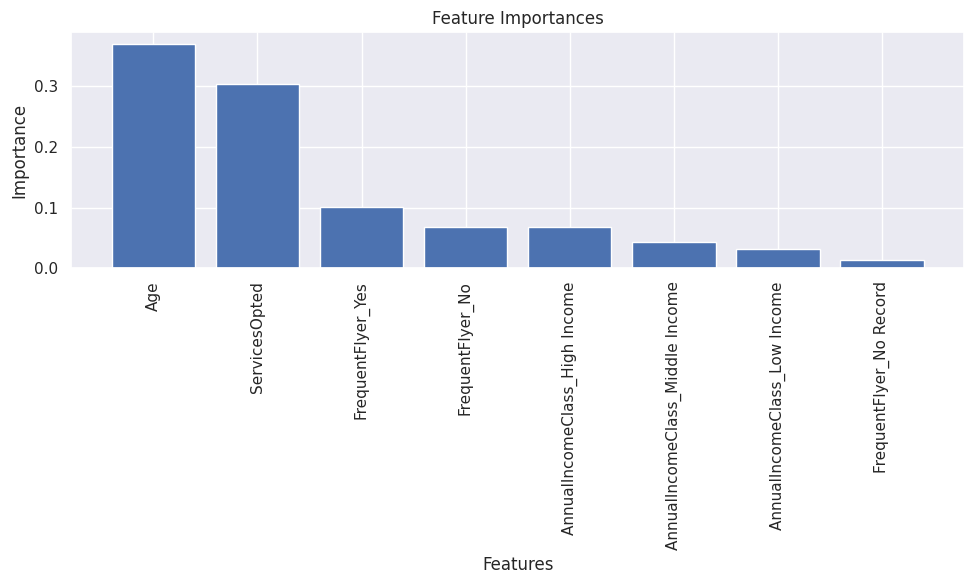

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to your training data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from pycaret.classification import *

# Assuming your DataFrame is named df
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Concatenate X_train and y_train for PyCaret setup
data = pd.concat([X_train, y_train], axis=1)

# Initialize PyCaret and setup the data
clf = setup(data=data, target='Target')

# Compare and select the best model
best_model = compare_models()

# Fit the best model on the training data
fitted_model = finalize_model(best_model)

# Make predictions on the test data
predictions = predict_model(fitted_model, data=X_test)

# Convert probability to binary label
predictions['Label'] = predictions['Score'].apply(lambda x: 1 if x >= 0.5 else 0)

# Print evaluation metrics
print(classification_report(y_test, predictions['Label']))
print('\nConfusion Matrix: \n')
s = sns.heatmap(confusion_matrix(y_test, predictions['Label']), annot=True, fmt='g', cmap='YlGnBu')
s.set(xlabel='Predicted class', ylabel='True class')
plt.show()

# Plot ROC curve and calculate AUC
fpr, tpr, _ = roc_curve(y_test, predictions['Score'])
auc_score = roc_auc_score(y_test, predictions['Score'])
plt.plot(fpr, tpr, color='blue', label='test: auc='+f'{auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()


,Description,Value
0,Session id,6769
1,Target,Target
2,Target type,Binary
3,Original data shape,"(572, 7)"
4,Transformed data shape,"(572, 9)"
5,Transformed train set shape,"(400, 9)"
6,Transformed test set shape,"(172, 9)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8925,0.9483,0.7322,0.8229,0.7507,0.6852,0.7019,0.4030
dt,Decision Tree Classifier,0.8775,0.8522,0.6656,0.8002,0.7058,0.6314,0.6485,0.3530
xgboost,Extreme Gradient Boosting,0.8775,0.9477,0.6978,0.7949,0.7174,0.6424,0.6607,0.2480
lightgbm,Light Gradient Boosting Machine,0.8750,0.9394,0.6878,0.7828,0.7125,0.6354,0.6491,0.3220
rf,Random Forest Classifier,0.8600,0.9328,0.6767,0.7546,0.6856,0.5989,0.6186,0.5960
et,Extra Trees Classifier,0.8525,0.8833,0.6022,0.7331,0.6472,0.5572,0.5706,0.7370
knn,K Neighbors Classifier,0.8350,0.8616,0.4556,0.7583,0.5411,0.4564,0.4896,0.2100
ada,Ada Boost Classifier,0.8225,0.8973,0.4756,0.6744,0.5442,0.4423,0.4588,0.4090
lda,Linear Discriminant Analysis,0.8125,0.8250,0.5167,0.6292,0.5605,0.4441,0.4516,0.2660
ridge,Ridge Classifier,0.8000,0.0000,0.3878,0.6044,0.4616,0.3508,0.3672,0.1600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyError: ignored